# Gaussian Processes

The following is a class implementing a noise-free Gaussian Process prediction model.

In [1]:
import numpy as np
import scipy as sc
import scipy.linalg
import kernels
from cholesky import cholesky

class GaussianProcess():
    def __init__(self, X, Y, cov):
        self.X = X
        self.Y = Y
        self.func = cov
        self.plotting1d = False
        self.plotting2d = False
        self.lam = 0.00001


    def drawGauss(self, X):
        kern = kernels.Kernels()
        K = kern.kern_matrix(X, X, self.func, self.lam)
        m = np.zeros((np.size(X), 1))
        u = np.random.normal(0, 1, (np.size(X), 1))
        L = cholesky(K)
        
        Y = m + np.dot(L, u)
        
        return Y

    def predict(self, X_):
        kern = kernels.Kernels()
        
        K_a = kern.kern_matrix(self.X, self.X, self.func, self.lam)
        K_b = kern.kern_matrix(self.X, X_, self.func)
        K_c = kern.kern_matrix(X_, self.X, self.func)
        K_d = kern.kern_matrix(X_, X_, self.func, self.lam)
        
        m = np.dot(np.dot(K_c, np.linalg.inv(K_a)), self.Y)
        m = np.reshape(m, (np.size(m), 1))
        #print(m)
        
        C = K_d - np.dot(np.dot(K_c, np.linalg.inv(K_a)), K_b)

        u = np.random.normal(0, 1, (np.size(X_, axis=0), 1))
        L = np.linalg.cholesky(C)

        Y_ = m + np.dot(L, u)

        return Y_

The function we are approximating in this example is shown below:

$$
f(\mathbf{x}) = 0.5(\sin(\mathbf{x}^2) + \sin(\mathbf{x}) + 0.25\mathbf{x} - 0.5)
$$

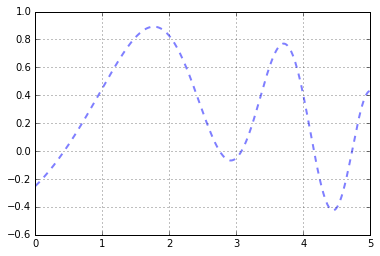

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

def foo(X):
    Y = 0.5 * (np.sin(X**2) + np.sin(X) + (0.25 * X) - 0.5)
    return Y
    
X_a = np.arange(0, 5, 0.01)
Y_a = foo(0.75 * X_a)

plt.plot(X_a, Y_a, ls="--", lw=2, alpha=0.5)

plt.grid()
plt.show()

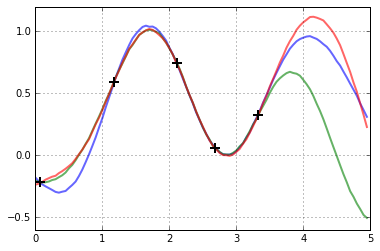

In [16]:
X = np.sort(5 * np.random.rand(5, 1), axis=0)
Y = foo(0.75 * X)
    
gp = GaussianProcess(X, Y, "sqr_exp")

X_ = np.arange(0, 5, 0.05)
    
Y_1 = gp.predict(X_)
Y_2 = gp.predict(X_)
Y_3 = gp.predict(X_)

   
plt.plot(X_, Y_1, lw=2, alpha=0.6)
plt.plot(X_, Y_2, lw=2, alpha=0.6)
plt.plot(X_, Y_3, lw=2, alpha=0.6)
plt.plot(X, Y, "+", markersize=10, mew=2, color="black", alpha=1)
plt.grid()
plt.show()